<a href="https://colab.research.google.com/github/jpdeleon/chronos/blob/master/notebooks/examples-lightcurves-tess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install git+https://github.com/jpdeleon/chronos.git@master

# TESS lightcurves

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pl
pl.style.use("default")

import chronos as cr

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


## long (30-minute) cadence 

In [3]:
#initialize LongCadence class
l = cr.LongCadence(toiid=200, sap_mask='square', aper_radius=2)

Target: TOI 200
Available sectors: [1]
Using sector=1.
Using TESS long cadence.



## custom

Using lightcurve with custom aperture.
Searching targetpixelfile for ra,dec=(354.915 -69.196) using Tesscut
Removing scattered light + applying PLD
Querying Gaia DR2 catalog for ra,dec=(354.915 -69.196) within 120.0 arcsec.


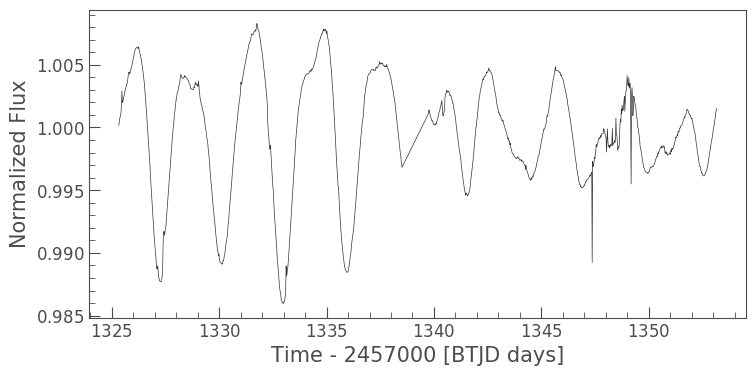

In [4]:
#make custom lightcurve
lc = l.make_custom_lc()
lc.plot();

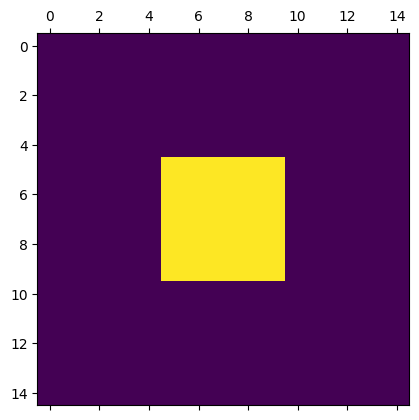

In [5]:
# show aperture mask
pl.matshow(l.aper_mask)

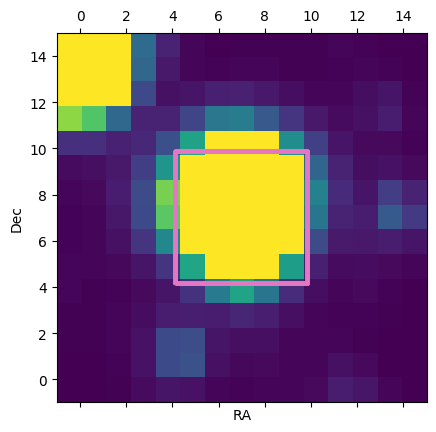

In [6]:
#show tpf with aperture mask
img = np.median(l.tpf_tesscut.flux, axis=0)
cr.plot_aperture_outline(img, mask=l.aper_mask)

### varying apertures

Using lightcurve with custom aperture.
Removing scattered light + applying PLD
Using lightcurve with custom aperture.
Removing scattered light + applying PLD
Using lightcurve with custom aperture.
Removing scattered light + applying PLD
Using lightcurve with custom aperture.
Removing scattered light + applying PLD


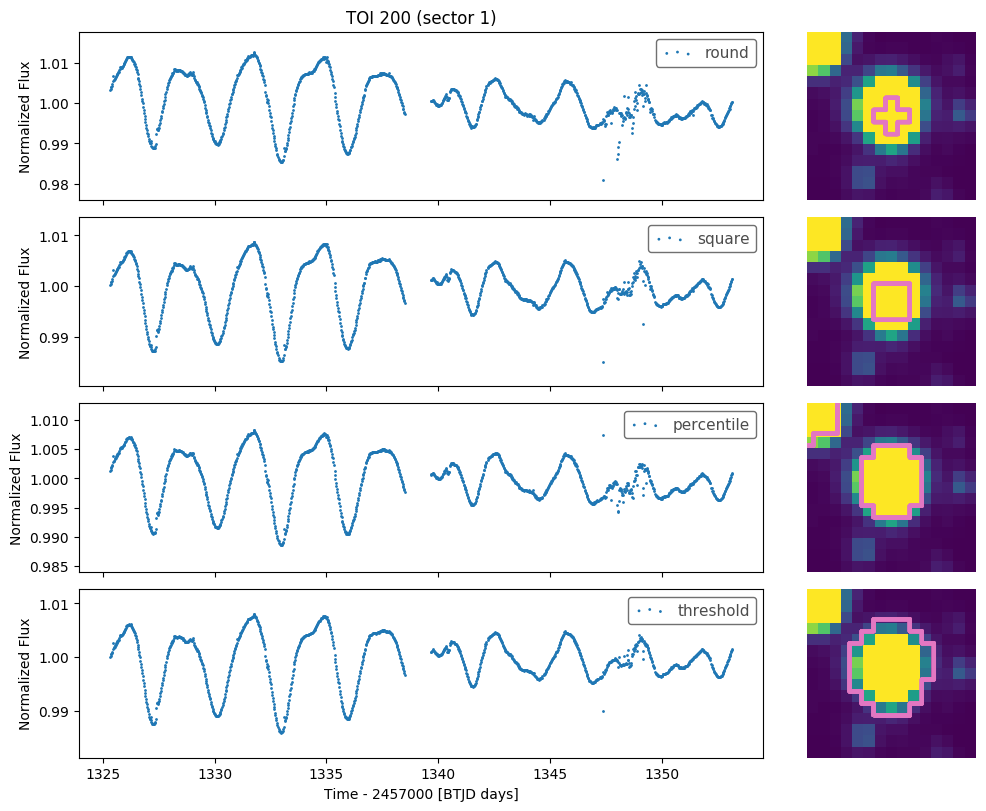

In [7]:
fig = l.plot_lc_per_aperture()

Querying Gaia DR2 catalog for ra,dec=(354.915 -69.196) within 3.0 arcsec.
Querying Gaia DR2 catalog for ra,dec=(354.915 -69.196) within 60.0 arcsec.
Querying DSS2 Red (2.38 arcmin x 2.38 arcmin) archival image


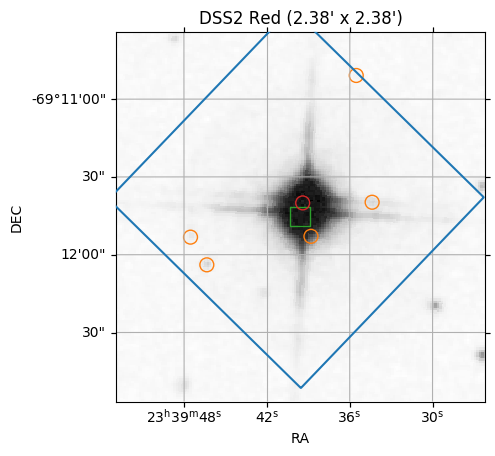

In [7]:
depth = l.toi_params['Depth (ppm)']/1e6
kmax = 1

#query target Gaia parameters
gaia_params = l.query_gaia_dr2_catalog(return_nearest_xmatch=True)

#query gaia sources 1 arcmin around the target 
gaia_sources = l.query_gaia_dr2_catalog(radius=60)

cr.plot_gaia_sources_on_survey(tpf=l.tpf_tesscut, 
                            sap_mask=l.sap_mask,
                            target_gaiaid=l.gaiaid, 
                            gaia_sources=l.gaia_sources, 
                            depth=depth, 
                            **kwargs
                           )

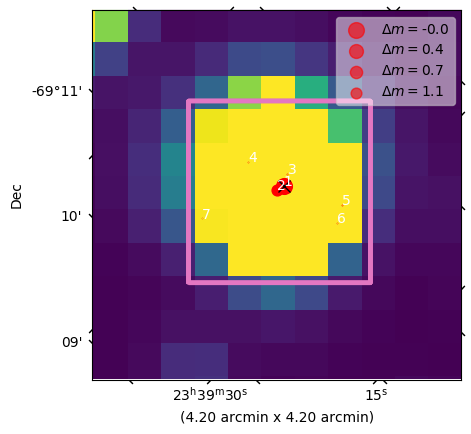

In [8]:
cr.plot_gaia_sources_on_tpf(tpf=l.tpf_tesscut, 
                            sap_mask=l.sap_mask,
                            target_gaiaid=l.gaiaid, 
                            gaia_sources=l.gaia_sources, 
                            depth=depth, 
                            **kwargs
                           )

### CDIPS method
* See also lightcurves-tess-cdips.ipynb

Target: TOI 837
Available sectors: [10 11]
Using sector=10.
Querying Gaia DR2 catalog for ra,dec=(157.037 -64.5052) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.
There are 2 TIC stars within 3.0 arcsec
Gaia and TIC catalog cross-match succeeded.
Found 2 CDIPS lightcurves.


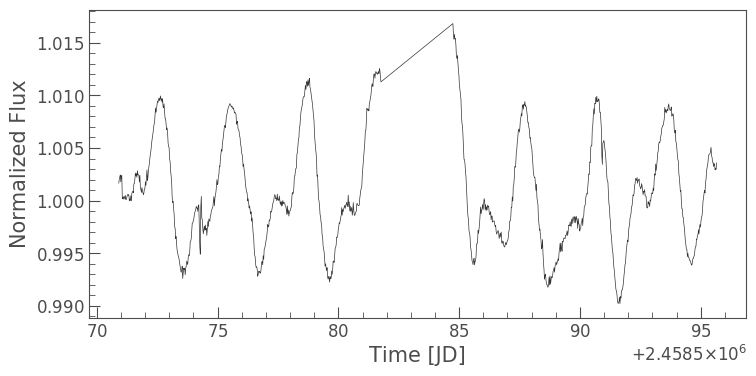

In [9]:
#get CDIPS lightcurve using a method that calls CDIPS class
l = cr.LongCadence(toiid=837)
lc = l.get_cdips_lc() 
lc.plot();

There are 2 gaia sources within 3.0 arcsec.
There are 2 TIC stars within 3.0 arcsec
Gaia and TIC catalog cross-match succeeded.
Found 2 CDIPS lightcurves.
There are 2 gaia sources within 3.0 arcsec.
There are 2 TIC stars within 3.0 arcsec
Gaia and TIC catalog cross-match succeeded.
Found 2 CDIPS lightcurves.
There are 2 gaia sources within 3.0 arcsec.
There are 2 TIC stars within 3.0 arcsec
Gaia and TIC catalog cross-match succeeded.
Found 2 CDIPS lightcurves.


Text(0.5, 1.0, 'TIC 460205581 (sector 10)')

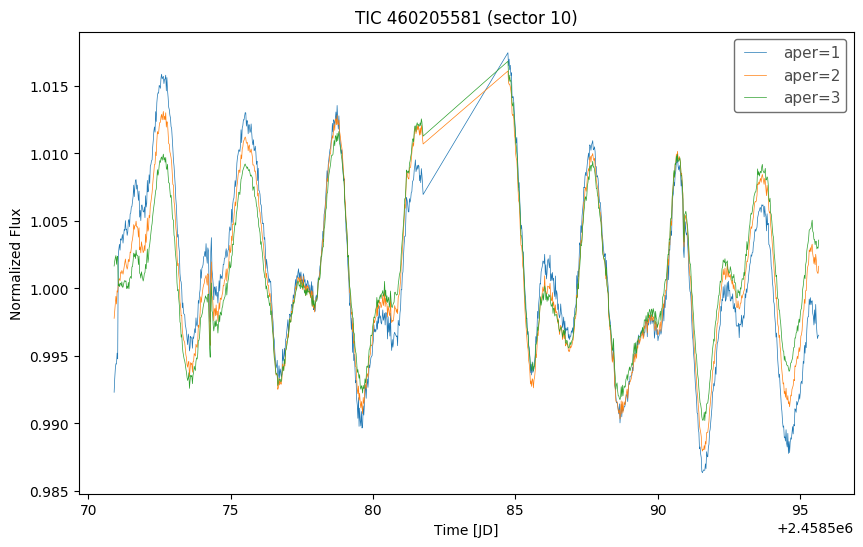

In [10]:
#vary aperture using index 1,2,3

cdips_lcs = {}
fig, ax = pl.subplots(1,1, figsize=(10,6))
for aper in [1,2,3]:
    lc = l.get_cdips_lc(sector=10, aper_idx=aper, verbose=False)
    lc.plot(ax=ax, label=f'aper={aper}')
    cdips_lcs[aper] = lc
ax.set_title(f'TIC {l.ticid} (sector {lc.sector})')

### PATHOS method
* See also lightcurves-tess-pathos.ipynb

Target: TOI 837
Available sectors: [10 11]
Using sector=10.
Querying Gaia DR2 catalog for ra,dec=(157.037 -64.5052) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


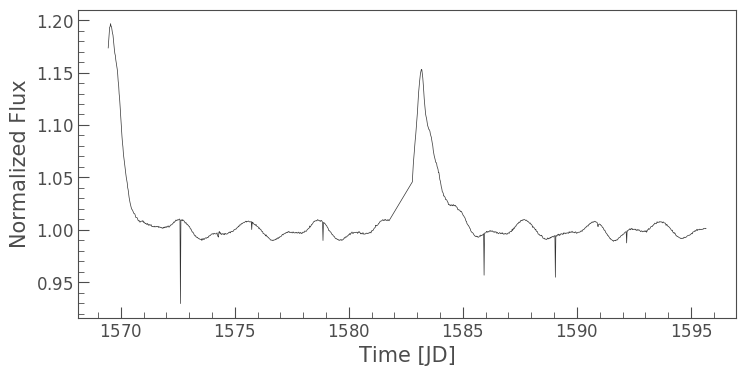

In [11]:
#get CDIPS lightcurve using a method that calls CDIPS class
l = cr.LongCadence(toiid=837)
lc = l.get_pathos_lc() 
lc.plot();

Text(0.5, 1.0, 'TIC 460205581 (sector 10)')

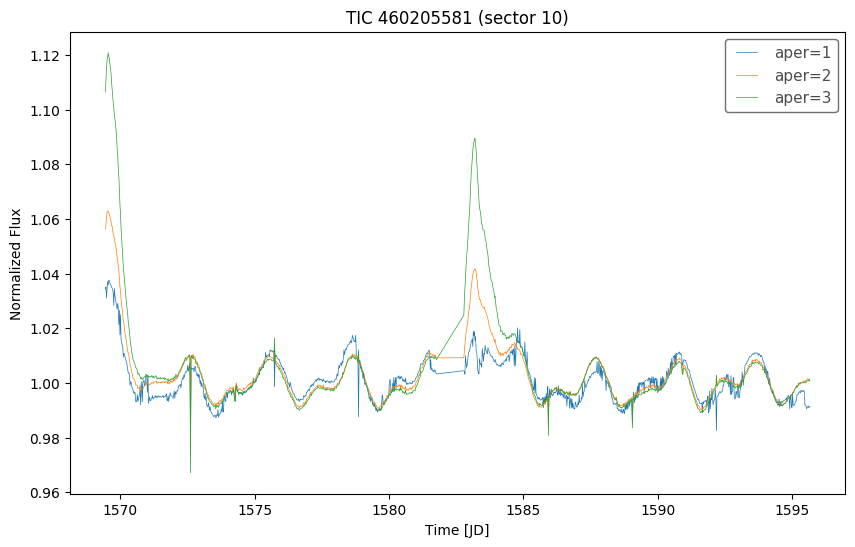

In [12]:
#vary aperture using index 1,2,3

pathos_lcs = {}
fig, ax = pl.subplots(1,1, figsize=(10,6))
for aper in [1,2,3]:
    lc = l.get_pathos_lc(aper_idx=aper)
    lc.plot(ax=ax, label=f'aper={aper}')
    pathos_lcs[aper] = lc
ax.set_title(f'TIC {l.ticid} (sector {lc.sector})')

## short cadence

In [1]:
import chronos as cr

s = cr.ShortCadence(toiid=837)

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Target: TOI 837
Available sectors: [10 11]
Using sector=10.
Using TESS short cadence.



### custom

Using lightcurve with custom aperture.

Searching mast for TIC 460205581

2 tpf(s) found in sector(s) [10, 11]
Using data from sector 10 only


Removing scattered light + applying PLD
Querying TIC catalog for ra,dec=(157.037 -64.5052) within 3.0 arcsec.
There are 2 TIC stars within 3.0 arcsec


Text(0.5, 1.0, 'TOI 837 (sector 10)')

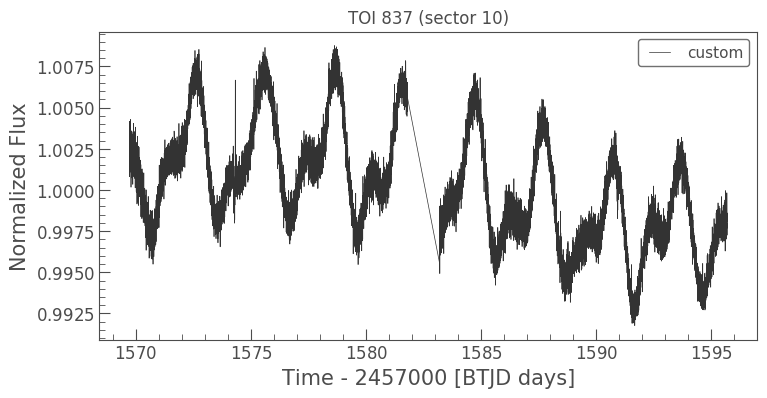

In [2]:
#make custom lc
custom_lc = s.make_custom_lc(sap_mask='pipeline')
ax = custom_lc.plot(label='custom')
ax.set_title(f'{s.target_name} (sector {s.sector})')

Using lightcurve with custom aperture.
Removing scattered light + applying PLD
Using lightcurve with custom aperture.
Brightest star is detected far from the center.
Aperture mask is placed at the center instead.

Removing scattered light + applying PLD
Using lightcurve with custom aperture.
Brightest star detected is far from the center.
Aperture mask is placed at the center instead.

Removing scattered light + applying PLD
Using lightcurve with custom aperture.
Removing scattered light + applying PLD
Using lightcurve with custom aperture.
Removing scattered light + applying PLD


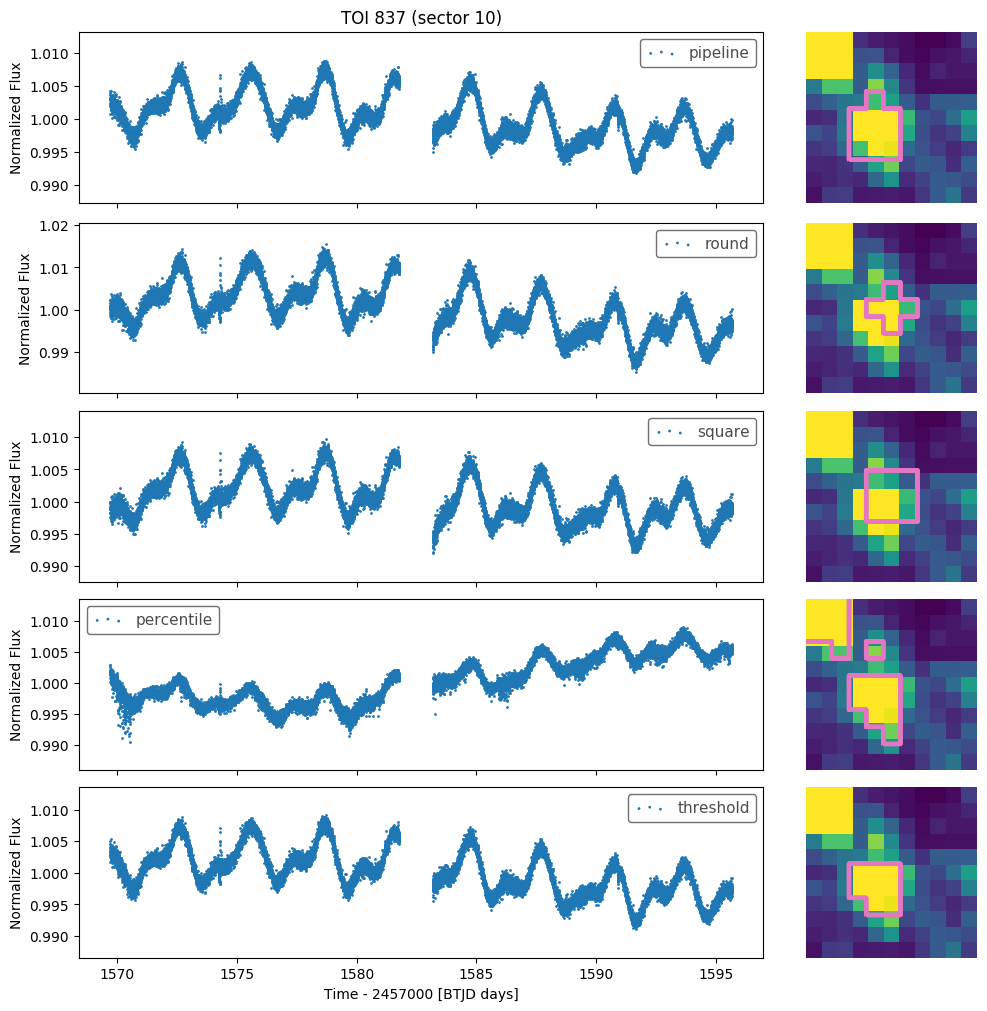

In [3]:
fig = s.plot_lc_per_aperture()

### pipeline lc: SAP and PDCSAP

Searching lightcurvefile for TIC 460205581 (sector 10)


Text(0.5, 1.0, 'TIC 460205581 (sector 10)')

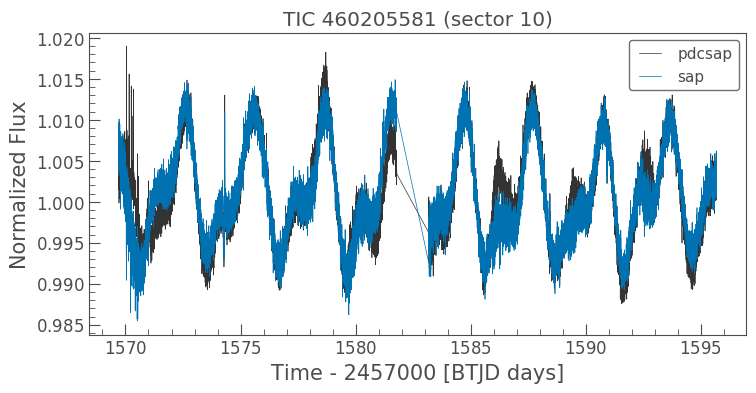

In [8]:
#get pipeline lc
pdcsap = s.get_lc(lctype='pdcsap')
ax = pdcsap.plot(label='pdcsap')

sap = s.get_lc(lctype='sap')
sap.plot(ax=ax, label='sap')
ax.set_title(f'{s.target_name} (sector {pdcsap.sector})')

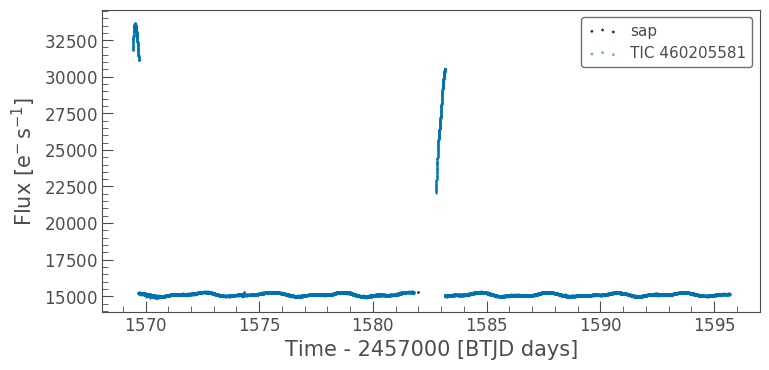

In [10]:
#note that these two are identical
ax = s.lc_sap.bin(100).scatter(label='sap') #sap
s.tpf.to_lightcurve(aperture_mask='pipeline').scatter(ax=ax, alpha=0.5) #also sap

## See also
* examples-stellar-rotation-gls.ipynb